<a href="https://colab.research.google.com/github/Veleno132/Fourier/blob/main/Fourier_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

#**Analisis Deret Fourier**

>Deret fourier adalah sebuah pendekatan suatu fungsi dengan menggunakan fungsi basis sinus dan cosinus.
<br><br>
Semua bentuk gelombang yang keseluruhannya terdefinisi pada bidang *real* dapat diaproksimasi dengan menggunakan deret fourier jika gelombang tersebut periodik.

**Persamaan Deret Fourier**
$$f(x)=a_0+\sum_{n=1}^{N}[a_n\cos(\frac{n\pi}{L}x)+b_n\sin(\frac{n\pi}{L}x)]$$

dengan
$$a_0=\frac{1}{2L}\int_{-L}^{L}f(x)dx$$
$$a_n=\frac{1}{L}\int_{-L}^{L}f(x)\cos(\frac{n\pi}{L}x)dx$$
$$b_n=\frac{1}{L}\int_{-L}^{L}f(x)\sin(\frac{n\pi}{L}x)dx$$

dan

$f(x)=$ Fungsi gelombang yang akan diaproksimasi

$P=2L=$ Periode Gelombang yang diaproksimasi

$n=1,2,3,...,\infty$ (Secara teori)
<br><br>

##Case Study: Pendekatan Square Wave dengan Fourier Series

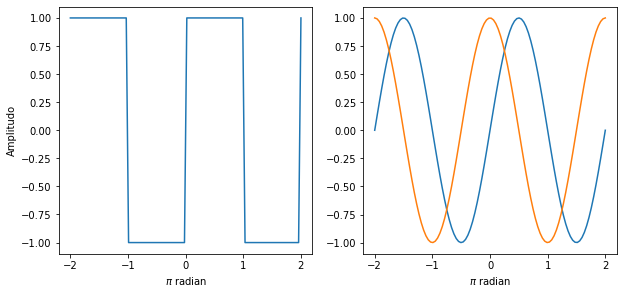

In [2]:
#@title
t = np.linspace(-2, 2, 100, endpoint=True)

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.plot(t, signal.square(2*np.pi*0.5*t))
plt.xlabel("$\pi$ radian")
plt.ylabel("Amplitudo")

plt.subplot(2,2,2)
plt.plot(t, np.sin(2*np.pi*0.5*t))
plt.plot(t, np.cos(2*np.pi*0.5*t))
plt.xlabel("$\pi$ radian")

plt.show()

Karena square wave memiliki periode = $2\pi$, maka:
$$a_0=\frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)dx$$
$$a_n=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos(nx)dx$$
$$b_n=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin(nx)dx$$

dengan
$$
f(x) = \left\{
    \begin{array}\\
        -1,&-\pi<x<0 \\
        1,&0<x<\pi
    \end{array}
\right.
$$

###Perhitungan $a_0$ :

In [3]:
x = np.linspace(-10, 10, 1000)

def f1(x):
  return -1

def f2(x):
  return 1

In [4]:
#quad adalah fungsi integral dari library scipy.integrate
f1_int = quad(f1, -np.pi, 0)[0]
f2_int = quad(f2, 0, np.pi)[0]

print(f1_int,f2_int)

a0 = 1/(2*np.pi) * (f1_int + f2_int)
print("a0 = ", a0)

-3.141592653589793 3.141592653589793
a0 =  0.0


###Perhitungan $a_n$ dan $b_n$

$$a_n=\frac{1}{\pi}(\int_{-\pi}^0-\cos(nx)dx + \int_0^{\pi}\cos(nx)dx)$$
$$b_n=\frac{1}{\pi}(\int_{-\pi}^0-\sin(nx)dx + \int_0^{\pi}\sin(nx)dx)$$

In [5]:
def an_1(x, n):
  return -np.cos(n*x)

def an_2(x, n):
  return np.cos(n*x)

def bn_1(x, n):
  return -np.sin(n*x)

def bn_2(x, n):
  return np.sin(n*x)

In [6]:
def sum(N=0):
  integral_sum = 0
  for i in range(1, N):
    n = i
    an = 1/np.pi * (quad(an_1, -np.pi, 0, args=(n))[0] + quad(an_2, 0, np.pi, args=(n))[0])
    an = an*np.cos(i*x)
    bn = 1/np.pi * (quad(bn_1, -np.pi, 0, args=(n))[0] + quad(bn_2, 0, np.pi, args=(n))[0])
    bn = bn*np.sin(i*x)
    integral_sum = integral_sum + (an + bn)
  return integral_sum

Dalam perhitungan manual didapatkan:
$$f(x)=\frac{4}{\pi}\sin(x)+\frac{4}{3\pi}\sin(3x)+\frac{4}{5\pi}\sin(5x)+...$$

###Plot Grafik

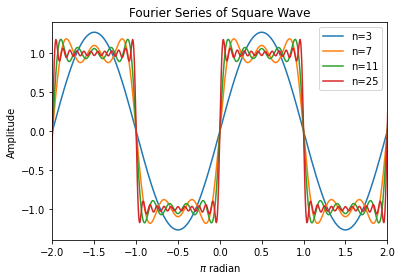

In [7]:
#@title
def plot_graph(x, N):
  plt.plot(x, sum(N))

plot_graph(x/np.pi, 3)
plot_graph(x/np.pi, 7)
plot_graph(x/np.pi, 11)
plot_graph(x/np.pi, 25)
plt.title("Fourier Series of Square Wave")
plt.xlabel("$\pi$ radian")
plt.ylabel("Amplitude")
plt.xlim(-2, 2)
plt.legend(['n=3', 'n=7', 'n=11', 'n=25'])
plt.show()

Dapat disimpulkan bahwa **semakin besar nilai n, maka grafik akan semakin mendekati** bentuk gelombang yang diaproksimasi

##Pendekatan Sawtooth Wave dengan Fourier Series

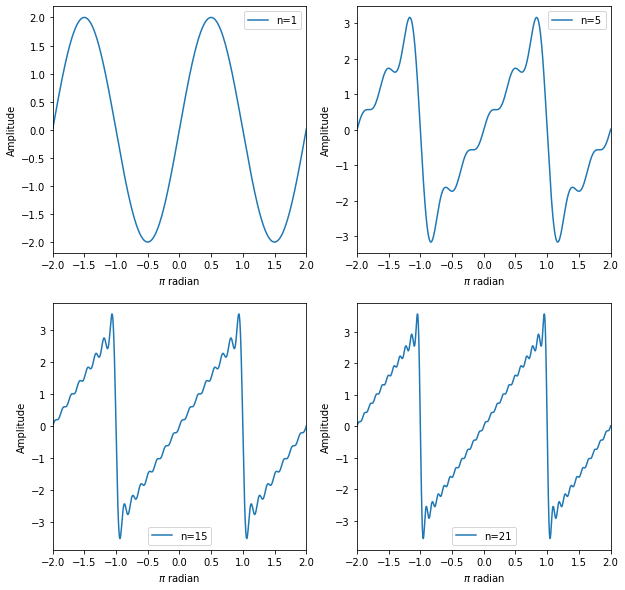

In [8]:
#@title
x = np.arange(-10, 10, .01)

def int_neg(x, n):
  return (x)*np.sin(n*x)

def int_pos(x, n):
  return (x)*np.sin(n*x)

def sum(N):
  final = 0
  for i in range(1, N+1):
    n = i
    int_sum = quad(int_neg, -np.pi, 0, args=(n))[0] + quad(int_pos, 0, np.pi, args=(n))[0]
    summation = 1/np.pi * int_sum * np.sin(n*x)
    final = final + summation
  return final

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(x/np.pi, sum(1))
plt.xlim(-2, 2)
plt.xlabel("$\pi$ radian")
plt.ylabel("Amplitude")
plt.legend(['n=1'])

plt.subplot(2,2,2)
plt.plot(x/np.pi, sum(5))
plt.xlim(-2, 2)
plt.xlabel("$\pi$ radian")
plt.ylabel("Amplitude")
plt.legend(['n=5'])

plt.subplot(2,2,3)
plt.plot(x/np.pi, sum(15))
plt.xlim(-2, 2)
plt.xlabel("$\pi$ radian")
plt.ylabel("Amplitude")
plt.legend(['n=15'])

plt.subplot(2,2,4)
plt.plot(x/np.pi, sum(21))
plt.xlim(-2, 2)
plt.xlabel("$\pi$ radian")
plt.ylabel("Amplitude")
plt.legend(['n=21'])

plt.show()